# Exploratory Data Analysis Pipeline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the clean file

df_clean = pd.read_csv(r"C:\Data_Analyst_Power_BI\Internship_Project_Unified\IBM HR Analytics\Data\Cleaned_data.csv")
df_clean.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,Yes,11,3,1,0,0,1,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,1,3,3,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,Yes,15,3,2,0,3,3,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,Yes,11,3,3,0,3,3,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,No,12,3,4,1,3,3,2,2,2


In [3]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobRole                   1470 non-null   object
 11  JobSatisfaction           1470 non-null   int64 
 12  MaritalStatus             1470 non-null   object
 13  MonthlyIncome             1470 non-null   int64 
 14  NumCompaniesWorked      

In [4]:
#Checking which JobRole has more Attrition rate
df_clean.groupby('JobRole')['Attrition'].value_counts(normalize=True)

JobRole                    Attrition
Healthcare Representative  No           0.931298
                           Yes          0.068702
Human Resources            No           0.769231
                           Yes          0.230769
Laboratory Technician      No           0.760618
                           Yes          0.239382
Manager                    No           0.950980
                           Yes          0.049020
Manufacturing Director     No           0.931034
                           Yes          0.068966
Research Director          No           0.975000
                           Yes          0.025000
Research Scientist         No           0.839041
                           Yes          0.160959
Sales Executive            No           0.825153
                           Yes          0.174847
Sales Representative       No           0.602410
                           Yes          0.397590
Name: proportion, dtype: float64

### As we can see that Job roles like - 
#### Human Resources, Laboratory Technician, Research Scientist and Sales Representative have higher Attrition

In [5]:
#Checking if Overtime working employees has more Attrition rate
df_clean.groupby('OverTime')['Attrition'].value_counts(normalize=True)

OverTime  Attrition
No        No           0.895636
          Yes          0.104364
Yes       No           0.694712
          Yes          0.305288
Name: proportion, dtype: float64

### Employees who are working Overtime are more likely to leave

In [6]:
#Checking if Married employees has more Attrition rate
df_clean.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True)

MaritalStatus  Attrition
Divorced       No           0.899083
               Yes          0.100917
Married        No           0.875186
               Yes          0.124814
Single         No           0.744681
               Yes          0.255319
Name: proportion, dtype: float64

### Single employees are more likely to leave

In [7]:
df_clean.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True)

WorkLifeBalance  Attrition
1                No           0.687500
                 Yes          0.312500
2                No           0.831395
                 Yes          0.168605
3                No           0.857783
                 Yes          0.142217
4                No           0.823529
                 Yes          0.176471
Name: proportion, dtype: float64

### Employees who have rated 1 have attrited more

In [8]:
df_clean.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True)

BusinessTravel     Attrition
Non-Travel         No           0.920000
                   Yes          0.080000
Travel_Frequently  No           0.750903
                   Yes          0.249097
Travel_Rarely      No           0.850431
                   Yes          0.149569
Name: proportion, dtype: float64

### Employees who frequently travelled attrited more

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

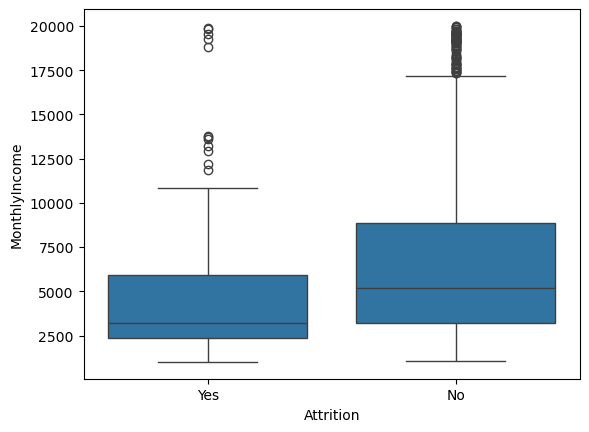

In [9]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_clean)

### Employees whose Salary is less are more likely to leave

<Axes: xlabel='Attrition', ylabel='JobSatisfaction'>

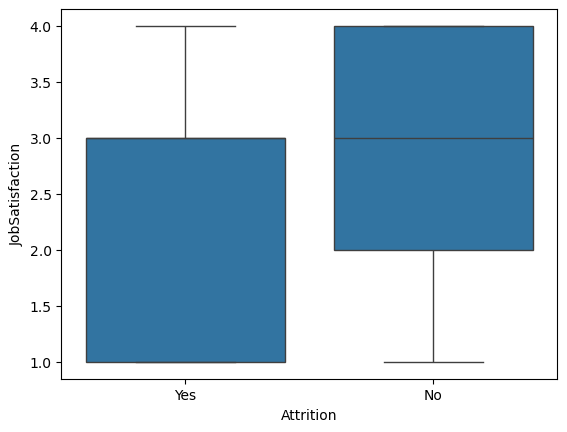

In [10]:
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df_clean)

<Axes: xlabel='Attrition', ylabel='YearsInCurrentRole'>

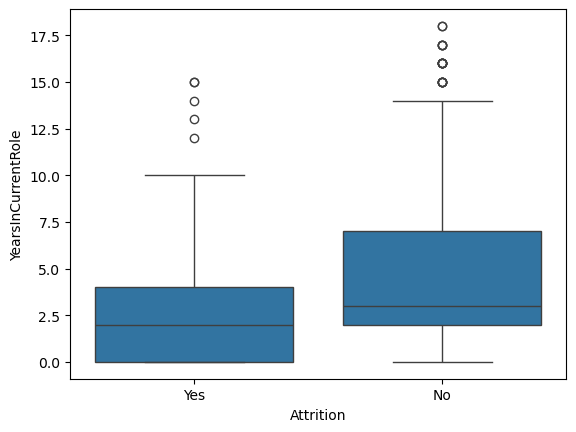

In [11]:
sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=df_clean)

<Axes: xlabel='Attrition', ylabel='Age'>

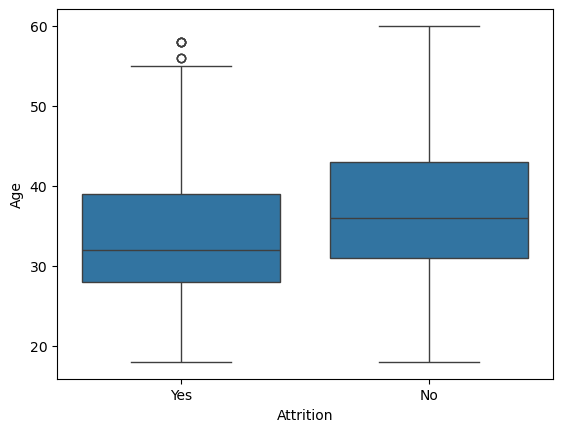

In [12]:
sns.boxplot(x='Attrition', y='Age', data=df_clean)

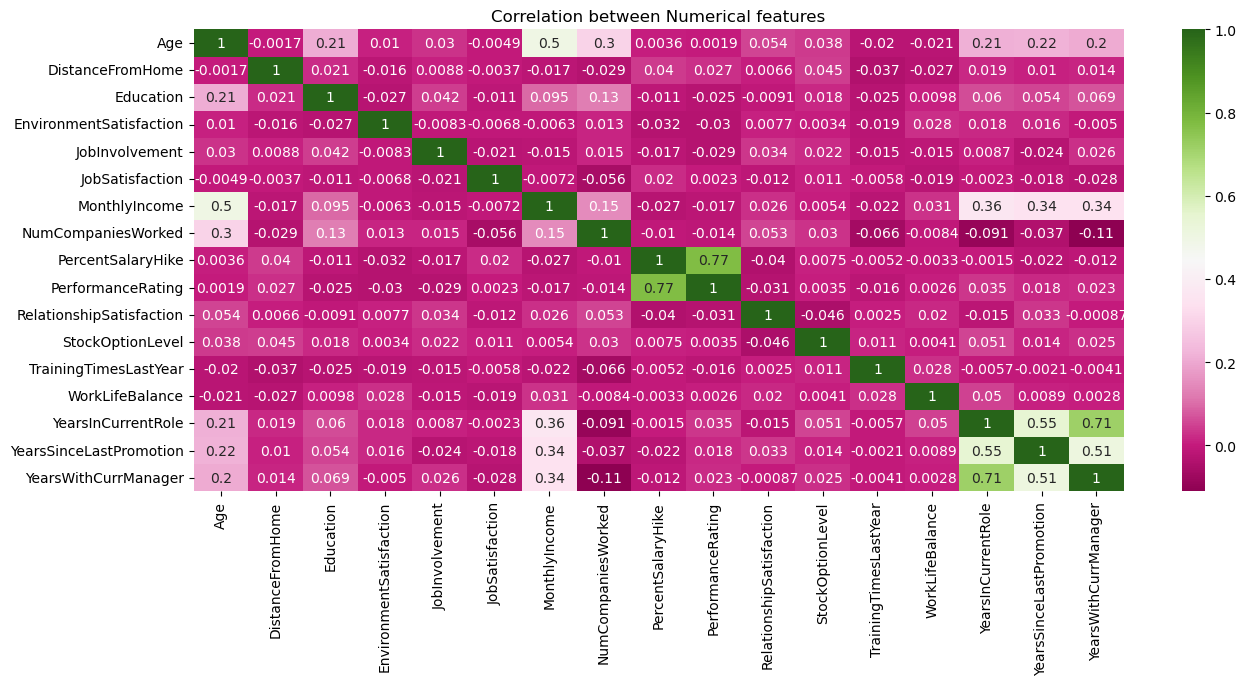

In [13]:
#Plotting a Heatmap to check the correlation between th Numerical values

corr = df_clean.corr(numeric_only=True)
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, cmap='PiYG')
plt.title('Correlation between Numerical features')
plt.show()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df_clean.select_dtypes(include='number')
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                     Feature         VIF
0                        Age   24.471765
1           DistanceFromHome    2.289187
2                  Education    9.333885
3    EnvironmentSatisfaction    6.936797
4             JobInvolvement   14.474810
5            JobSatisfaction    6.851189
6              MonthlyIncome    4.430699
7         NumCompaniesWorked    2.519543
8          PercentSalaryHike   41.192740
9          PerformanceRating  105.113071
10  RelationshipSatisfaction    7.165659
11          StockOptionLevel    1.883868
12     TrainingTimesLastYear    5.559485
13           WorkLifeBalance   15.058502
14        YearsInCurrentRole    5.476202
15   YearsSinceLastPromotion    2.253210
16      YearsWithCurrManager    5.098348


In [15]:
#Dropping the unnecessary columns as per the VIF values
df2 = df_clean.drop(columns=['DistanceFromHome', 'EnvironmentSatisfaction', 'StockOptionLevel', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'JobSatisfaction'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   Education                 1470 non-null   int64 
 5   EducationField            1470 non-null   object
 6   Gender                    1470 non-null   object
 7   JobInvolvement            1470 non-null   int64 
 8   JobRole                   1470 non-null   object
 9   MaritalStatus             1470 non-null   object
 10  MonthlyIncome             1470 non-null   int64 
 11  OverTime                  1470 non-null   object
 12  PercentSalaryHike         1470 non-null   int64 
 13  PerformanceRating         1470 non-null   int64 
 14  RelationshipSatisfaction

### Using Label Encoder for Categorical columns and Standardization for Numerical columns

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

columns_to_encode =['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numerical_cols = df2.select_dtypes(include=['int64']).columns

y = df2['Attrition'].map({'Yes':1, 'No':0})  

scaler = StandardScaler()
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df2[column] = label_encoders[column].fit_transform(df2[column])


### Feature Importance

In [17]:
from sklearn.ensemble import RandomForestClassifier

X1 = df2.drop(columns=['Attrition'])
y = df2['Attrition']

rf = RandomForestClassifier(random_state=42)
rf.fit(X1, y)
feature_importance = pd.Series(rf.feature_importances_, index=X1.columns).sort_values(ascending=False)
print(feature_importance)


MonthlyIncome               0.183581
Age                         0.132084
PercentSalaryHike           0.078685
YearsInCurrentRole          0.078636
OverTime                    0.071649
JobRole                     0.061577
WorkLifeBalance             0.056593
EducationField              0.052571
MaritalStatus               0.052313
RelationshipSatisfaction    0.051507
JobInvolvement              0.050550
Education                   0.046298
BusinessTravel              0.030517
Gender                      0.023359
Department                  0.020557
PerformanceRating           0.009523
dtype: float64


In [18]:
df2 = df2.drop(columns = ['PerformanceRating'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   int64  
 3   Department                1470 non-null   int64  
 4   Education                 1470 non-null   int64  
 5   EducationField            1470 non-null   int64  
 6   Gender                    1470 non-null   int64  
 7   JobInvolvement            1470 non-null   float64
 8   JobRole                   1470 non-null   int64  
 9   MaritalStatus             1470 non-null   int64  
 10  MonthlyIncome             1470 non-null   float64
 11  OverTime                  1470 non-null   int64  
 12  PercentSalaryHike         1470 non-null   float64
 13  RelationshipSatisfaction  1470 non-null   float64
 14  WorkLife

In [19]:
df2.shape

(1470, 16)

In [20]:
# Save the results to a CSV file
df2.to_csv(r"C:\Data_Analyst_Power_BI\Internship_Project_Unified\IBM HR Analytics\Data\data_EDA.csv", index=False)